## [EI-DA 전자산업 데이터분석]  TV Shipment Analysis

**<div style="text-align: right">Update date: May 6, 2021.</div>**
**<div style="text-align: right">Copyright(c) 2021-2022 Youngmin Park All rights reserved.</div>**

**"CONFIDENTIAL.TV_shipment_20210716.csv" : 지역별 TV 선적 실적에 대한 데이터**

## 라이브러리 임포트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams['font.family'] = ['NanumBarunGothic', 'Malgun Gothic', 'AppleGothic']  # 한글 출력을 위한 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

## 데이터 불러오기 

In [ ]:
rawdata_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataVisualization_python/data/CONFIDENTIAL.TV_shipment_20210716.csv', index_col=0)

In [ ]:
rawdata_df

,2016,2017,2018,2019,2020,2021E,2022E,2023E
Quantity (000s),,,,,,,,
Japan,5043.7720,4960.90800,5240.52200,5556.387,6294.62800,6600.00000,5800.00000,5300.00000
North America,43524.0868,41637.51744,43892.53100,42531.892,51937.45599,47482.00000,40700.00000,42200.00000
Western Europe,29939.5740,29377.95200,29135.49558,30145.910,31027.11100,32218.00000,30273.00000,28550.00000
Eastern Europe,14570.6360,14729.26500,15483.14075,16537.124,17286.47700,16709.00000,16775.00000,15921.00000
China,59789.2100,53685.85100,54533.15000,53108.499,47375.80600,46168.00000,47316.00000,49383.00000
Asia & Oceania,33598.6320,34464.87500,36690.49400,38091.309,34235.02700,35216.00000,37258.00000,38674.00000
Latin America & the Caribbean,22221.2340,23221.78907,24165.89400,24492.926,24164.51800,25288.00000,25381.00000,24160.00000
Middle East & Africa,14049.6300,13094.31100,12221.69500,12450.704,13148.90900,13376.40372,13866.43992,13159.70298
Total,222736.7748,215172.46850,221362.92230,222914.751,225469.93200,223057.40370,217369.43990,217347.70300


## EDA 탐색적 데이터 분석 수행하기

In [ ]:
# 데이터의 형태
rawdata_df.shape

(9, 8)

In [ ]:
# 데이터 컬럼 정보
rawdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Japan to Total
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2016    9 non-null      float64
 1   2017    9 non-null      float64
 2   2018    9 non-null      float64
 3   2019    9 non-null      float64
 4   2020    9 non-null      float64
 5   2021E   9 non-null      float64
 6   2022E   9 non-null      float64
 7   2023E   9 non-null      float64
dtypes: float64(8)
memory usage: 648.0+ bytes


In [ ]:
# 데이터 통계 정보
rawdata_df.describe()

,2016,2017,2018,2019,2020,2021E,2022E,2023E
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,49497.061067,47816.104112,49191.760514,49536.611333,50104.429332,49568.311936,48304.319980,48299.489553
std,67068.341732,64556.944186,66444.637486,66759.432879,67467.170789,66564.630193,64808.495137,65012.701517
min,5043.772000,4960.908000,5240.522000,5556.387000,6294.628000,6600.000000,5800.000000,5300.000000
25%,14570.636000,14729.265000,15483.140750,16537.124000,17286.477000,16709.000000,16775.000000,15921.000000
50%,29939.574000,29377.952000,29135.495580,30145.910000,31027.111000,32218.000000,30273.000000,28550.000000
75%,43524.086800,41637.517440,43892.531000,42531.892000,47375.806000,46168.000000,40700.000000,42200.000000
max,222736.774800,215172.468500,221362.922300,222914.751000,225469.932000,223057.403700,217369.439900,217347.703000


## 데이터 시각화 해보기

우선 Pie Chart를 빠르게 하나 그려봅니다

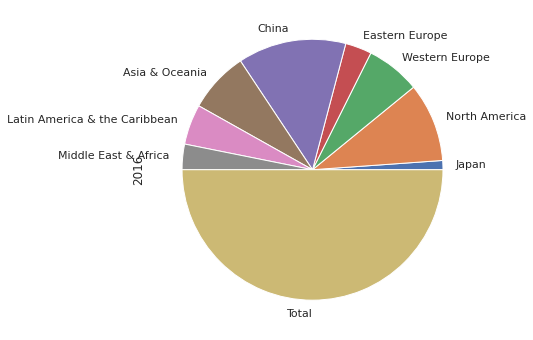

In [ ]:
rawdata_df['2016'].plot(figsize=(12,6), kind='pie');

Total이 포함되어 있어, 그래프가 왜곡됩니다.  
Total을 제거한 후, 그래프를 그려야 의도대로 점유율을 볼 수 있습니다.

In [ ]:
# .drop 함수를 이용하여 index 혹은 column을 제거할 수 있습니다.
# 제거할 대상으로 인덱스를 하나 넣어주어도 되고, 리스트로 여러개를 넣을 수 있습니다.
rawdata_df.drop(index=['Japan', 'Total'])

,2016,2017,2018,2019,2020,2021E,2022E,2023E
Quantity (000s),,,,,,,,
North America,43524.0868,41637.51744,43892.53100,42531.892,51937.45599,47482.00000,40700.00000,42200.00000
Western Europe,29939.5740,29377.95200,29135.49558,30145.910,31027.11100,32218.00000,30273.00000,28550.00000
Eastern Europe,14570.6360,14729.26500,15483.14075,16537.124,17286.47700,16709.00000,16775.00000,15921.00000
China,59789.2100,53685.85100,54533.15000,53108.499,47375.80600,46168.00000,47316.00000,49383.00000
Asia & Oceania,33598.6320,34464.87500,36690.49400,38091.309,34235.02700,35216.00000,37258.00000,38674.00000
Latin America & the Caribbean,22221.2340,23221.78907,24165.89400,24492.926,24164.51800,25288.00000,25381.00000,24160.00000
Middle East & Africa,14049.6300,13094.31100,12221.69500,12450.704,13148.90900,13376.40372,13866.43992,13159.70298


In [ ]:
# Total 행을 제거한 dataframe을 새로 할당
shipment_graph_df = rawdata_df.drop(index='Total')
shipment_graph_df

,2016,2017,2018,2019,2020,2021E,2022E,2023E
Quantity (000s),,,,,,,,
Japan,5043.7720,4960.90800,5240.52200,5556.387,6294.62800,6600.00000,5800.00000,5300.00000
North America,43524.0868,41637.51744,43892.53100,42531.892,51937.45599,47482.00000,40700.00000,42200.00000
Western Europe,29939.5740,29377.95200,29135.49558,30145.910,31027.11100,32218.00000,30273.00000,28550.00000
Eastern Europe,14570.6360,14729.26500,15483.14075,16537.124,17286.47700,16709.00000,16775.00000,15921.00000
China,59789.2100,53685.85100,54533.15000,53108.499,47375.80600,46168.00000,47316.00000,49383.00000
Asia & Oceania,33598.6320,34464.87500,36690.49400,38091.309,34235.02700,35216.00000,37258.00000,38674.00000
Latin America & the Caribbean,22221.2340,23221.78907,24165.89400,24492.926,24164.51800,25288.00000,25381.00000,24160.00000
Middle East & Africa,14049.6300,13094.31100,12221.69500,12450.704,13148.90900,13376.40372,13866.43992,13159.70298


Total이 제거된 graph df로 차트를 다시 그려봅니다

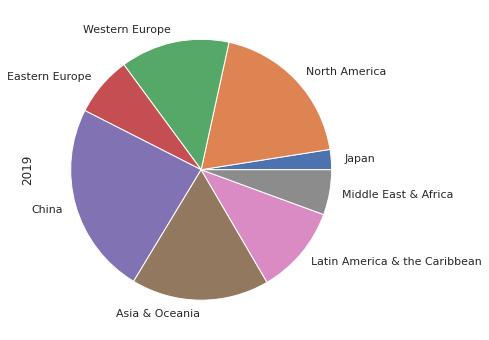

In [ ]:
shipment_graph_df['2019'].plot(figsize=(12,6), kind='pie');

#b조 활동

##과제1

Text(0.5, 1.0, '2016 TV shipment')

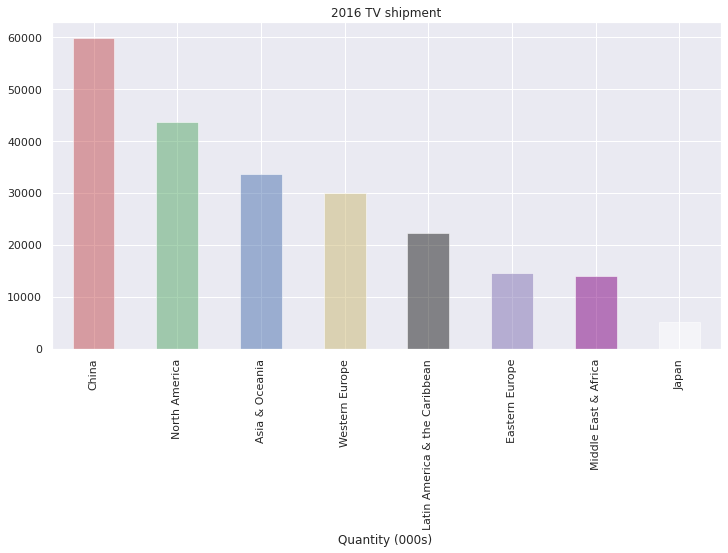

In [ ]:
shipment_graph_df['2016'].sort_values(ascending=False).plot(figsize=(12,6), kind='bar', color = ['r', 'g', 'b', 'y', 'k', 'm', 'purple', 'w'], alpha = 0.5);
plt.title('2016 TV shipment')

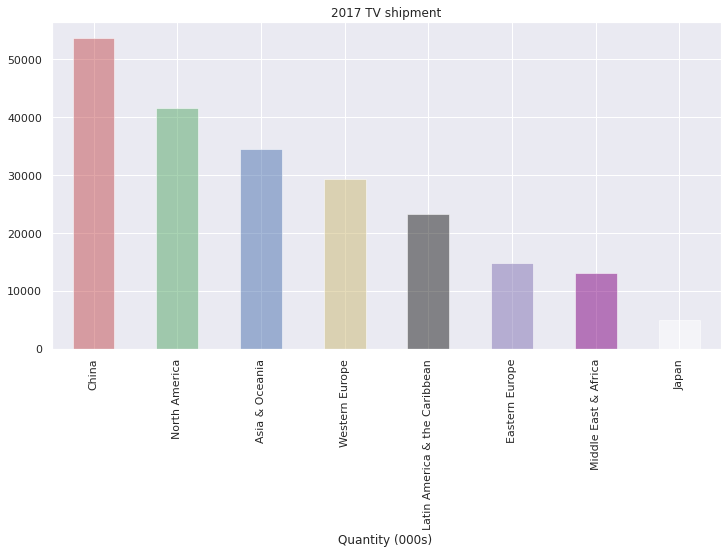

In [ ]:
shipment_graph_df['2017'].sort_values(ascending=False).plot(figsize=(12,6), kind='bar', color = ['r', 'g', 'b', 'y', 'k', 'm', 'purple', 'w'], alpha = 0.5);
plt.title('2017 TV shipment');

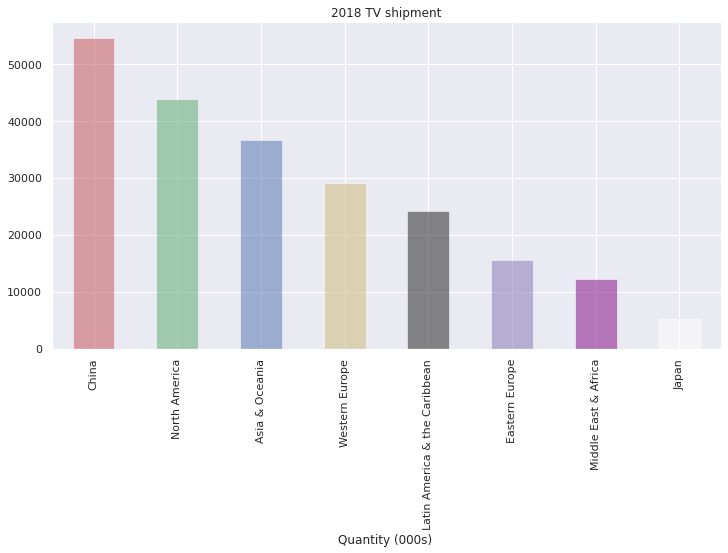

In [ ]:
shipment_graph_df['2018'].sort_values(ascending=False).plot(figsize=(12,6), kind='bar', color = ['r', 'g', 'b', 'y', 'k', 'm', 'purple', 'w'], alpha = 0.5);
plt.title('2018 TV shipment');

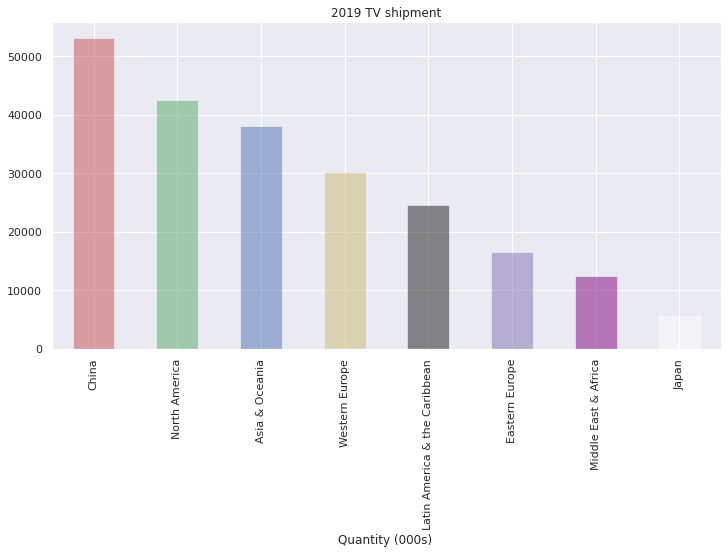

In [ ]:
shipment_graph_df['2019'].sort_values(ascending=False).plot(figsize=(12,6), kind='bar', color = ['r', 'g', 'b', 'y', 'k', 'm', 'purple', 'w'], alpha = 0.5);
plt.title('2019 TV shipment');

##과제2

In [ ]:
shipment_graph_df_int = shipment_graph_df.astype('int')
shipment_graph_df_int

,2016,2017,2018,2019,2020,2021E,2022E,2023E
Quantity (000s),,,,,,,,
Japan,5043,4960,5240,5556,6294,6600,5800,5300
North America,43524,41637,43892,42531,51937,47482,40700,42200
Western Europe,29939,29377,29135,30145,31027,32218,30273,28550
Eastern Europe,14570,14729,15483,16537,17286,16709,16775,15921
China,59789,53685,54533,53108,47375,46168,47316,49383
Asia & Oceania,33598,34464,36690,38091,34235,35216,37258,38674
Latin America & the Caribbean,22221,23221,24165,24492,24164,25288,25381,24160
Middle East & Africa,14049,13094,12221,12450,13148,13376,13866,13159


Text(0.5, 1.0, 'total shipment by year')

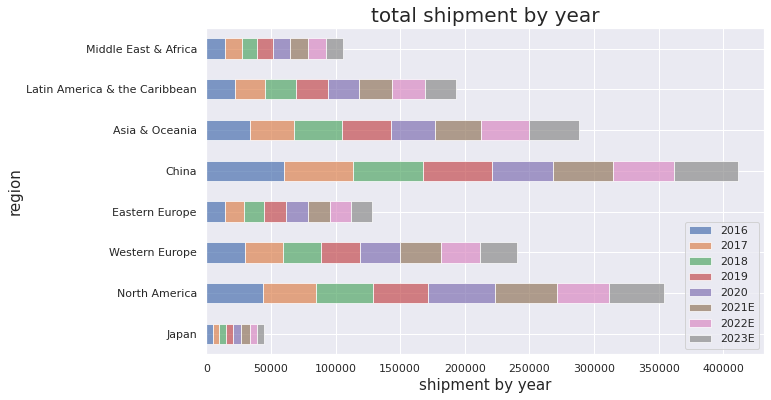

In [ ]:
shipment_graph_df_int = shipment_graph_df.astype('int')
shipment_graph_df_int.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)
 
plt.xlabel('shipment by year', size=15)
plt.ylabel('region', size=15)
plt.title('total shipment by year', size=20)

각 지역별 연도별 전체 TV선적 추이를 누적 bar차트를 통해 시각

In [ ]:
shipment_graph_df

,2016,2017,2018,2019,2020,2021E,2022E,2023E
Quantity (000s),,,,,,,,
Japan,5043.7720,4960.90800,5240.52200,5556.387,6294.62800,6600.00000,5800.00000,5300.00000
North America,43524.0868,41637.51744,43892.53100,42531.892,51937.45599,47482.00000,40700.00000,42200.00000
Western Europe,29939.5740,29377.95200,29135.49558,30145.910,31027.11100,32218.00000,30273.00000,28550.00000
Eastern Europe,14570.6360,14729.26500,15483.14075,16537.124,17286.47700,16709.00000,16775.00000,15921.00000
China,59789.2100,53685.85100,54533.15000,53108.499,47375.80600,46168.00000,47316.00000,49383.00000
Asia & Oceania,33598.6320,34464.87500,36690.49400,38091.309,34235.02700,35216.00000,37258.00000,38674.00000
Latin America & the Caribbean,22221.2340,23221.78907,24165.89400,24492.926,24164.51800,25288.00000,25381.00000,24160.00000
Middle East & Africa,14049.6300,13094.31100,12221.69500,12450.704,13148.90900,13376.40372,13866.43992,13159.70298


In [ ]:
shipment_graph_df = shipment_graph_df.astype

In [ ]:
shipment_graph_df_T = shipment_graph_df_T
shipment_graph_df_T

Quantity (000s),Japan,North America,Western Europe,Eastern Europe,China,Asia & Oceania,Latin America & the Caribbean,Middle East & Africa,group
2016,5043.772,43524.08680,29939.57400,14570.63600,59789.210,33598.632,22221.23400,14049.63000,past
2017,4960.908,41637.51744,29377.95200,14729.26500,53685.851,34464.875,23221.78907,13094.31100,past
2018,5240.522,43892.53100,29135.49558,15483.14075,54533.150,36690.494,24165.89400,12221.69500,past
2019,5556.387,42531.89200,30145.91000,16537.12400,53108.499,38091.309,24492.92600,12450.70400,past
2020,6294.628,51937.45599,31027.11100,17286.47700,47375.806,34235.027,24164.51800,13148.90900,past
2021E,6600.000,47482.00000,32218.00000,16709.00000,46168.000,35216.000,25288.00000,13376.40372,expectation
2022E,5800.000,40700.00000,30273.00000,16775.00000,47316.000,37258.000,25381.00000,13866.43992,expectation
2023E,5300.000,42200.00000,28550.00000,15921.00000,49383.000,38674.000,24160.00000,13159.70298,expectation


In [ ]:
shipment_graph_df_T

Quantity (000s),Japan,North America,Western Europe,Eastern Europe,China,Asia & Oceania,Latin America & the Caribbean,Middle East & Africa,group
2016,5043.772,43524.08680,29939.57400,14570.63600,59789.210,33598.632,22221.23400,14049.63000,past
2017,4960.908,41637.51744,29377.95200,14729.26500,53685.851,34464.875,23221.78907,13094.31100,past
2018,5240.522,43892.53100,29135.49558,15483.14075,54533.150,36690.494,24165.89400,12221.69500,past
2019,5556.387,42531.89200,30145.91000,16537.12400,53108.499,38091.309,24492.92600,12450.70400,past
2020,6294.628,51937.45599,31027.11100,17286.47700,47375.806,34235.027,24164.51800,13148.90900,past
2021E,6600.000,47482.00000,32218.00000,16709.00000,46168.000,35216.000,25288.00000,13376.40372,expectation
2022E,5800.000,40700.00000,30273.00000,16775.00000,47316.000,37258.000,25381.00000,13866.43992,expectation
2023E,5300.000,42200.00000,28550.00000,15921.00000,49383.000,38674.000,24160.00000,13159.70298,expectation


##과제3

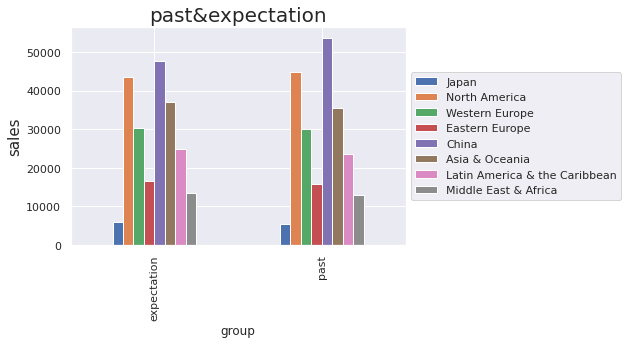

In [ ]:
shipment_graph_df_T['group'] = ['past','past','past','past','past','expectation','expectation','expectation']
 
 
groups = shipment_graph_df_T.groupby('group')
group_mean = groups.mean()
group_mean.plot.bar()
 
plt.ylabel('sales', size=15)
plt.title('past&expectation', size=20)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()


2016년 부터 2020년까지의 실제 판매량과 2021년 부터 2023년까지 예측 판매량을 그룹으로 나누어 막대 그래프로 시각화 함.
실제 판매량과 예측값의 추이가 비슷하다. 

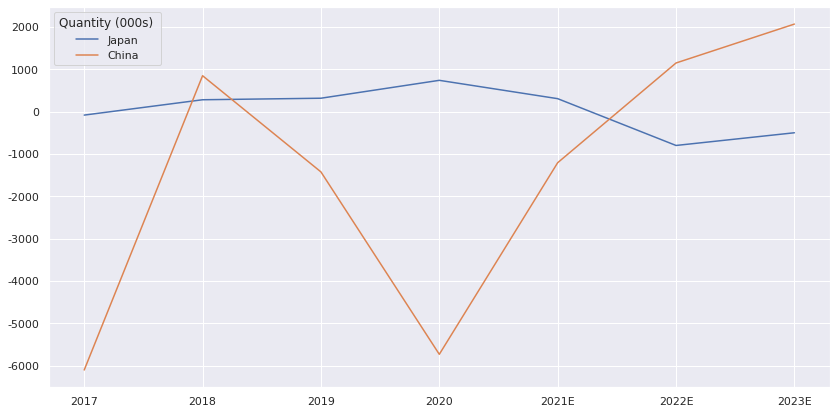

In [ ]:
shipment_graph_df_T.iloc[:,[0,4]].diff().plot(figsize=(14,7));

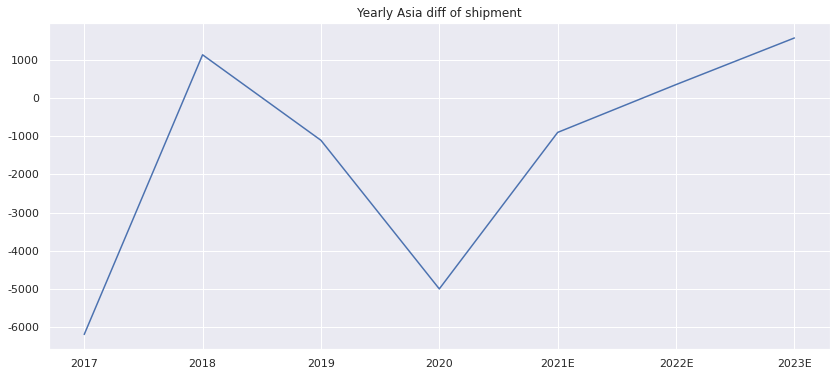

In [ ]:
shipment_graph_df_T_copy = shipment_graph_df_T
shipment_graph_df_T_copy['Asia'] = (shipment_graph_df_T_copy['Japan'] + shipment_graph_df_T_copy['China'])
shipment_graph_df_T_copy.drop('Japan', axis=1, inplace=False)
shipment_graph_df_T_copy.drop('China', axis=1, inplace=False)
shipment_graph_df_T_copy['Asia'].diff().plot(figsize=(14, 6))
plt.title('Yearly Asia diff of shipment');

2021년까지 가장 큰 성장을 보여준 일본, 가장 큰 역성장을 보여준 중국의 데이터를 합쳐 연도별 성장률을 나타낸 결과, 중국의 판매량이 일본의 판매량에 비해 크기 때문에 둘을 합친 성장률도 중국의 성장률 그래프와 비슷한 것을 볼 수 있다.

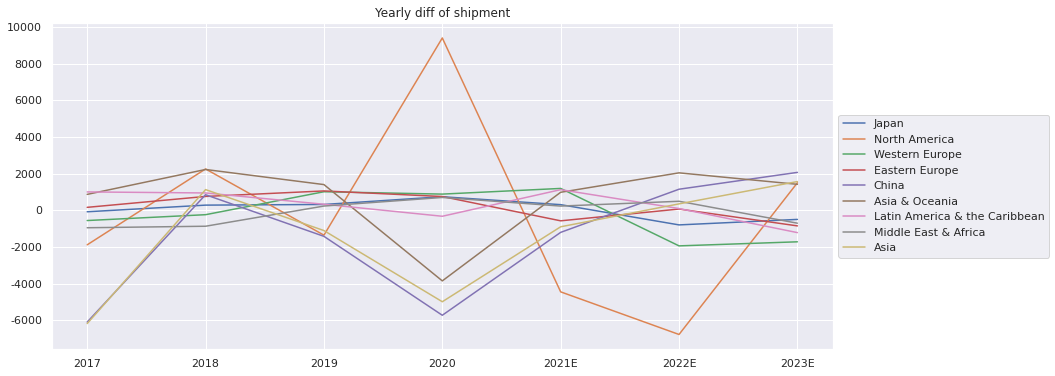

In [ ]:
shipment_graph_df_T.diff().plot(figsize=(14, 6))
plt.title('Yearly diff of shipment');
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))


Text(0.5, 1.0, '2017&2020 growth')

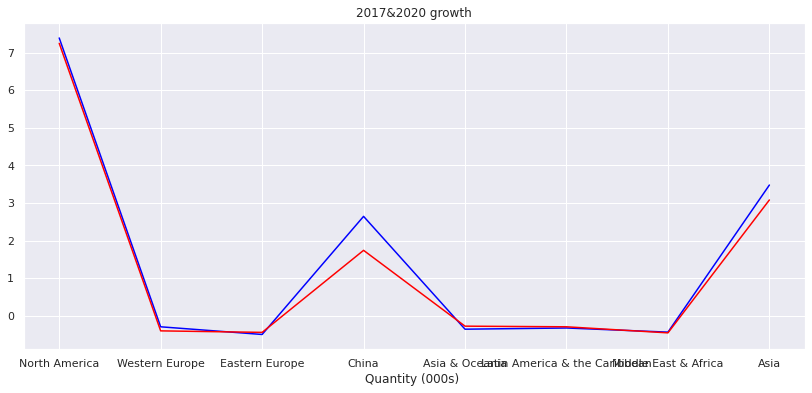

In [ ]:
shipment_graph_df_T.loc['2017'].pct_change().plot(figsize=(14,6),kind='line',color='blue')
shipment_graph_df_T.loc['2020'].pct_change().plot(figsize=(14,6),kind='line',color='red')
plt.title("2017&2020 growth")

2017년도와 2020년도의 수익률만을 분석했을때 China에서 가장 큰 성장률 변화가 보였습니다. 2017년보다 2020년의 성장률이 많이 감소하였습니다.